# News Sentiment Based Portfolio-management #

In [11]:
import pandas as pd
df = pd.read_csv(r'/content/analyst_ratings_processed.csv')
data = df[df['stock']=='ADBE']
data['date'] = data['date'].str.split(' ').str[0]
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.head()

<ipython-input-11-118d4ea7fd0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].str.split(' ').str[0]
<ipython-input-11-118d4ea7fd0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


,Unnamed: 0,title,date,stock
18493,21991.0,"UBS Maintains Buy on Adobe, Raises Price Targe...",2020-06-08,ADBE
18494,21992.0,Stocks That Hit 52-Week Highs On Thursday,2020-06-04,ADBE
18495,21993.0,Shares of several companies in the broader tec...,2020-05-27,ADBE
18496,21994.0,Stocks That Hit 52-Week Highs On Tuesday,2020-05-26,ADBE
18497,21995.0,Shares of several technology companies are tra...,2020-05-20,ADBE


In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def generate_sentiment_score(news):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(news)
    return scores['compound']

# Assuming 'news' is the name of your news column
data['sentiment_score'] = data['title'].apply(generate_sentiment_score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-12-51702093c106>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['title'].apply(generate_sentiment_score)


In [13]:
stock=pd.read_csv(r'/content/ADBE_data.csv')
stock.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,ADBE,ADBE,ADBE,ADBE,ADBE,ADBE
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-08-13,0.19805707037448883,0.2109380066394806,0.21875,0.2109380066394806,0.0,18899200
3,1986-08-14,0.20905956625938416,0.2226559966802597,0.2304690033197403,0.2226559966802597,0.0,4160000
4,1986-08-15,0.2053920477628708,0.21875,0.2226559966802597,0.21875,0.0,4332800


In [17]:
import pandas as pd
stock = stock.dropna(subset=['Adj Close'])
stock = stock.iloc[1:]
stock['Date'] = stock['Price']
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head() # Assuming 'close' is the column named 'Adj Close'

,Price,Adj Close,Close,High,Low,Open,Volume,Date
3,1986-08-14,0.20905956625938416,0.2226559966802597,0.2304690033197403,0.2226559966802597,0.0,4160000,1986-08-14
4,1986-08-15,0.2053920477628708,0.21875,0.2226559966802597,0.21875,0.0,4332800,1986-08-15
5,1986-08-18,0.19805707037448883,0.2109380066394806,0.21875,0.2109380066394806,0.0,2828800,1986-08-18
6,1986-08-19,0.20172467827796936,0.2148440033197403,0.21875,0.2148440033197403,0.0,2060800,1986-08-19
7,1986-08-20,0.20172467827796936,0.2148440033197403,0.2265630066394806,0.2148440033197403,0.0,684800,1986-08-20


In [29]:
# Filter the DataFrame to keep rows where the year is between 2010 and 2019 (inclusive)
stock = stock[(stock['Date'].dt.year >= 2015) & (stock['Date'].dt.year <= 2015)]
data = data[(data['date'].dt.year >= 2015) & (data['date'].dt.year <= 2015)]
stock['Adj Close'] = stock['Adj Close'].astype(float)
data.head()
# stock.head()

<ipython-input-29-046be5ea2105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Adj Close'] = stock['Adj Close'].astype(float)


,Unnamed: 0,title,date,stock,sentiment_score
19352,22858.0,Why Underweight Stocks Will Continue To Outper...,2015-12-30,ADBE,-0.3612
19353,22859.0,Global Equities Trip Chowdhry Says 2016 Stocks...,2015-12-21,ADBE,0.1027
19354,22860.0,Stocks Hitting 52-Week Highs,2015-12-17,ADBE,0.0000
19355,22861.0,Stocks Hitting 52-Week Highs,2015-12-15,ADBE,0.0000
19356,22862.0,Where's The Best Place To Work In America?,2015-12-13,ADBE,0.6369


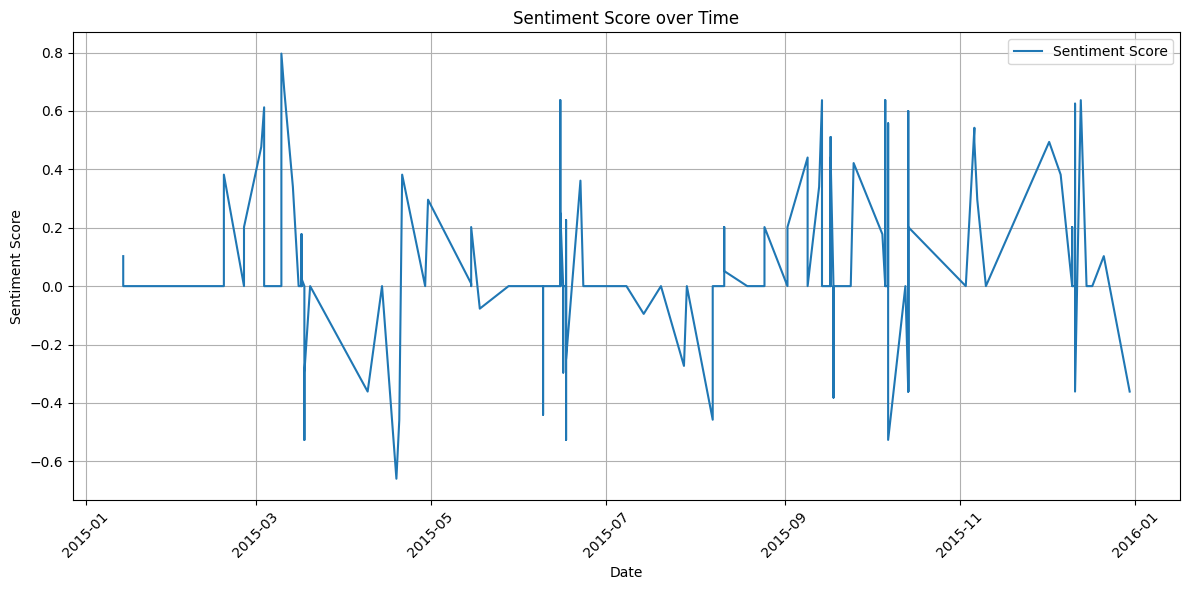

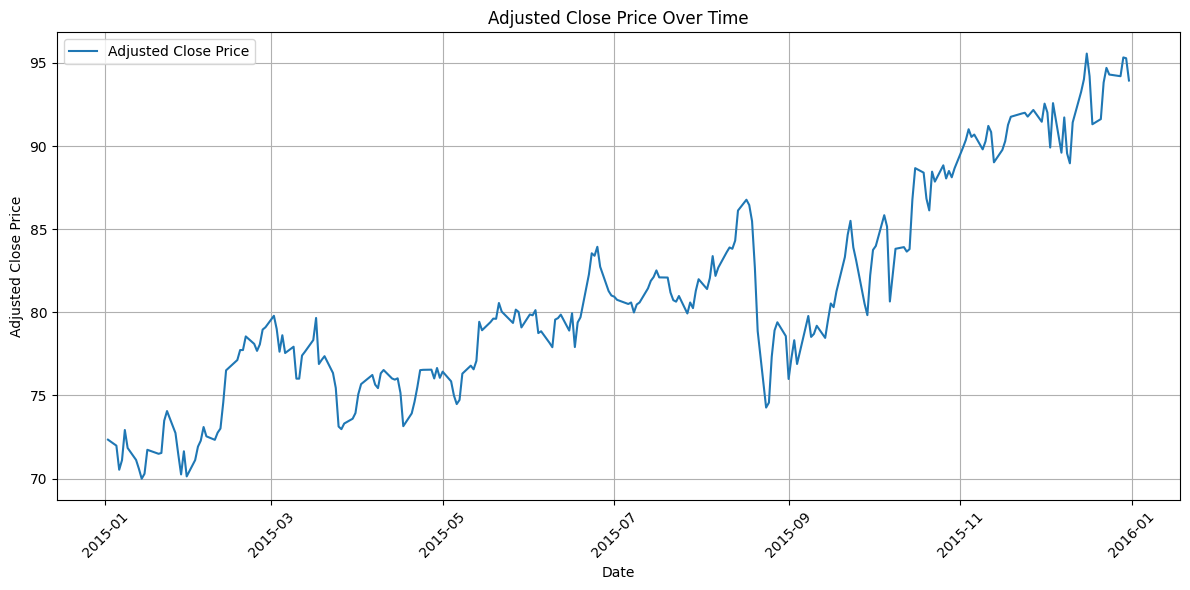

In [30]:
# prompt: plot the time series data of sentiment score vs date from data dataframe and Adj close vs Date from Stock dataframe

import matplotlib.pyplot as plt

# Assuming 'date' is the date column in the 'data' DataFrame and 'sentiment_score' is the sentiment score column
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['sentiment_score'], label='Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming 'Date' is the date column in the 'stock' DataFrame and 'Adj Close' is the adjusted closing price column
plt.figure(figsize=(12, 6))
plt.plot(stock['Date'], stock['Adj Close'], label='Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# prompt: here i want to predict the stock price based on the sentiment score ,  i want ot use a neural network which will input the sentiment score and the date and predict the adjusted close price ( donot load the saved model , train it first then test based on new model)

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import r2_score

# Prepare the data (assuming 'data' and 'stock' DataFrames are already prepared as in your code)
# Merge the data
merged_df = pd.merge(data, stock, left_on='date', right_on='Date', how='inner')
merged_df = merged_df.dropna(subset=['Adj Close', 'sentiment_score'])
merged_df = merged_df.sort_values(by='Date')

# Feature scaling
scaler_price = MinMaxScaler()
merged_df['Adj Close'] = scaler_price.fit_transform(merged_df[['Adj Close']])
scaler_sentiment = MinMaxScaler()
merged_df['sentiment_score'] = scaler_sentiment.fit_transform(merged_df[['sentiment_score']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]['Adj Close']
        xs.append([[item['sentiment_score'], item['Adj Close']] for item in x]) # Create a list of lists with sentiment_score and Adj Close
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10 # Example sequence length
X, y = create_sequences(merged_df[['sentiment_score', 'Adj Close']].to_dict('records'), seq_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and X_test are already in the correct shape after modification to create_sequences

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)


# Inverse transform the predictions
y_pred = scaler_price.inverse_transform(y_pred)
y_test = scaler_price.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1951
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0541 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0286
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0445
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0226
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0217
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0239
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0173 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0166
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0175
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0148
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11m

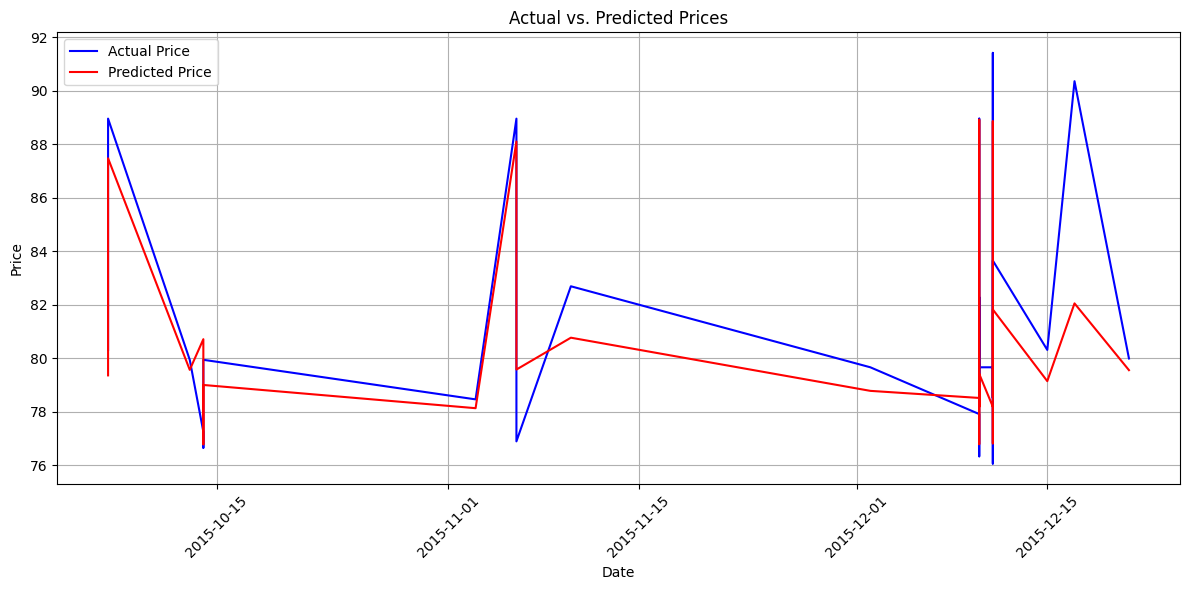

In [36]:
# prompt: above code is goof now plot the data and prediction (also in X axis include the time )

import matplotlib.pyplot as plt

# Assuming 'merged_df' and 'seq_length' are defined as in your previous code
# ... (your existing code) ...

# Get the dates corresponding to the test set predictions
test_dates = merged_df['Date'].iloc[seq_length:-1].iloc[len(X_train):]

# Plotting actual vs. predicted prices with time
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual Price', color='blue')
plt.plot(test_dates, y_pred, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#*Now i trained the neural network without the " Sentiment Score " and have given only "Date" as an input.*#

<ipython-input-39-a41261d7776a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].str.split(' ').str[0]
<ipython-input-39-a41261d7776a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2170
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0934
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0218
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0337
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0261
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0161
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0166
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0179
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0148
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0179
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━

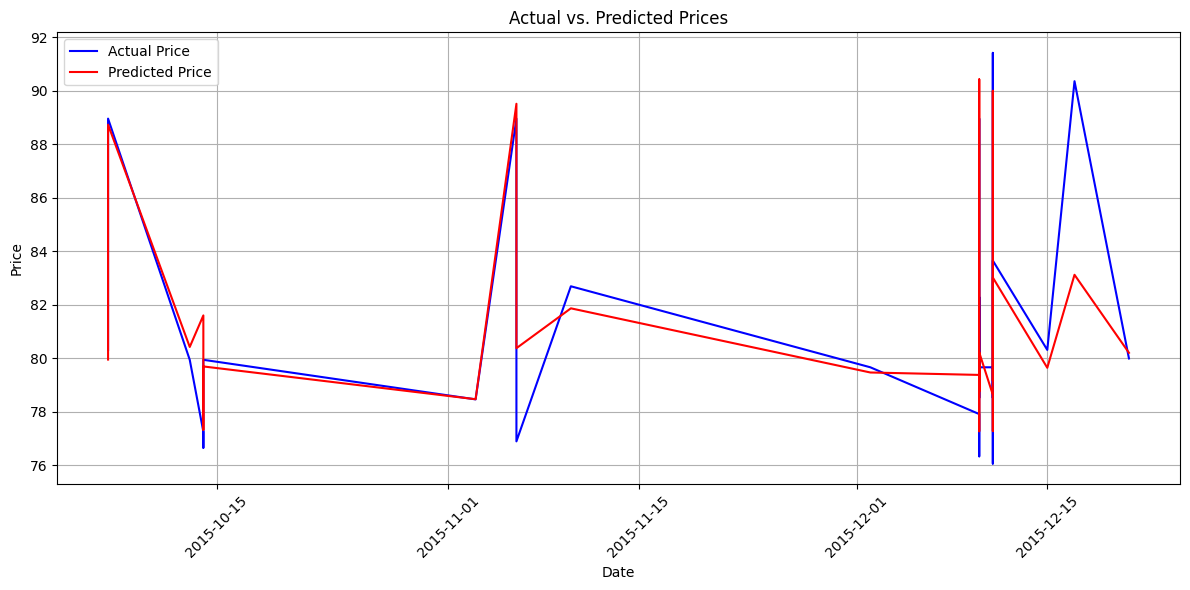

In [39]:
# prompt: just change the above code where i was inputing two variables named ' sentiment score' and 'Date' as the input , now i want to input just ;date' as an input and everything remains same ( no need to include the sentiment score in the code , i want to train the model based simply on the date)

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv(r'/content/analyst_ratings_processed.csv')
data = df[df['stock']=='ADBE']
data['date'] = data['date'].str.split(' ').str[0]
data['date'] = pd.to_datetime(data['date'], errors='coerce')

stock=pd.read_csv(r'/content/ADBE_data.csv')
stock = stock.dropna(subset=['Adj Close'])
stock = stock.iloc[1:]
stock['Date'] = pd.to_datetime(stock['Price'])

# Filter data for the year 2015
stock = stock[(stock['Date'].dt.year >= 2015) & (stock['Date'].dt.year <= 2015)]
data = data[(data['date'].dt.year >= 2015) & (data['date'].dt.year <= 2015)]
stock['Adj Close'] = stock['Adj Close'].astype(float)

# Merge data
merged_df = pd.merge(data, stock, left_on='date', right_on='Date', how='inner')
merged_df = merged_df.dropna(subset=['Adj Close'])
merged_df = merged_df.sort_values(by='Date')

# Feature scaling
scaler_price = MinMaxScaler()
merged_df['Adj Close'] = scaler_price.fit_transform(merged_df[['Adj Close']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]['Adj Close']
        xs.append([item['Adj Close'] for item in x])
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(merged_df[['Adj Close']].to_dict('records'), seq_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred = scaler_price.inverse_transform(y_pred)
y_test = scaler_price.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Get the dates corresponding to the test set predictions
test_dates = merged_df['Date'].iloc[seq_length:-1].iloc[len(X_train):]


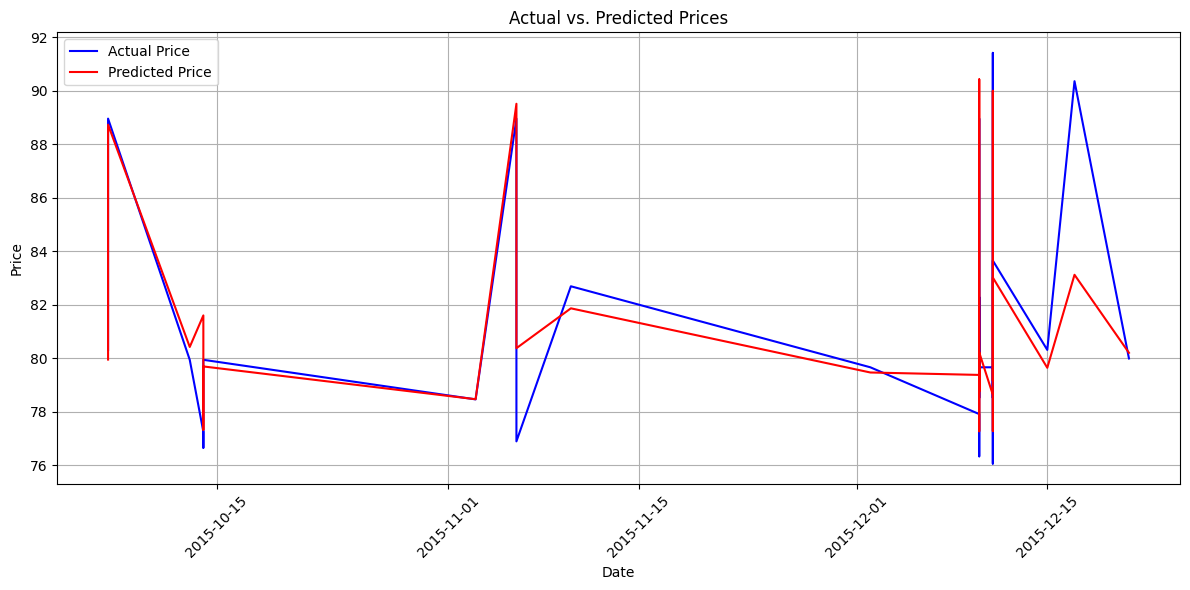

In [40]:
# Plotting actual vs. predicted prices with time
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual Price', color='blue')
plt.plot(test_dates, y_pred, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()